In [2]:
import fastbook

In [3]:
fastbook.setup_book()

In [4]:
from fastbook import *

In [ ]:
path = Path('images/Images')

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = bears.dataloaders(path)

c:\Users\bonru\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


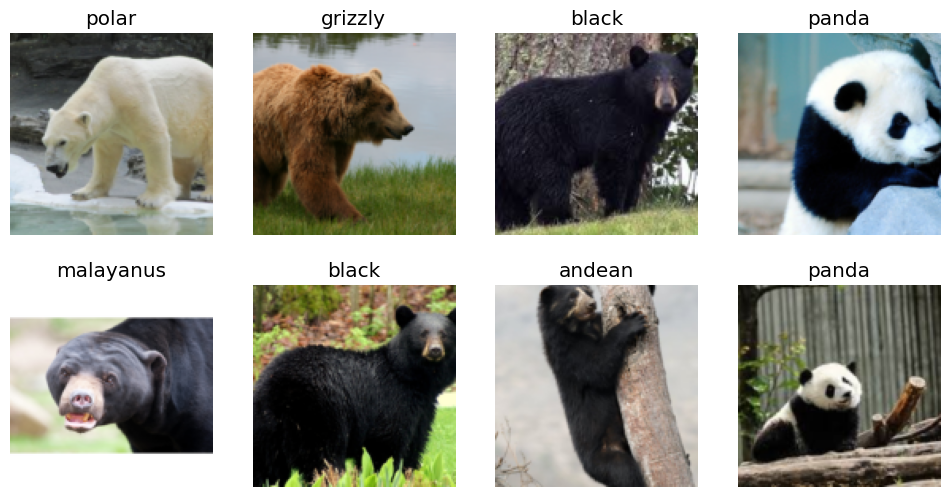

In [8]:
dls.valid.show_batch(max_n=8, nrows=2)

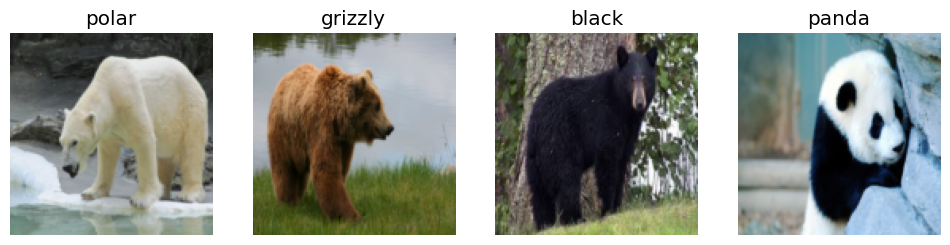

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

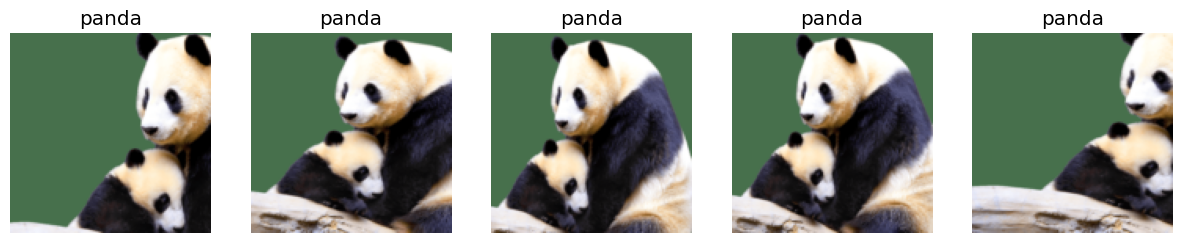

In [10]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path,bs=5)
dls.train.show_batch(max_n=6, nrows=1, unique=True)

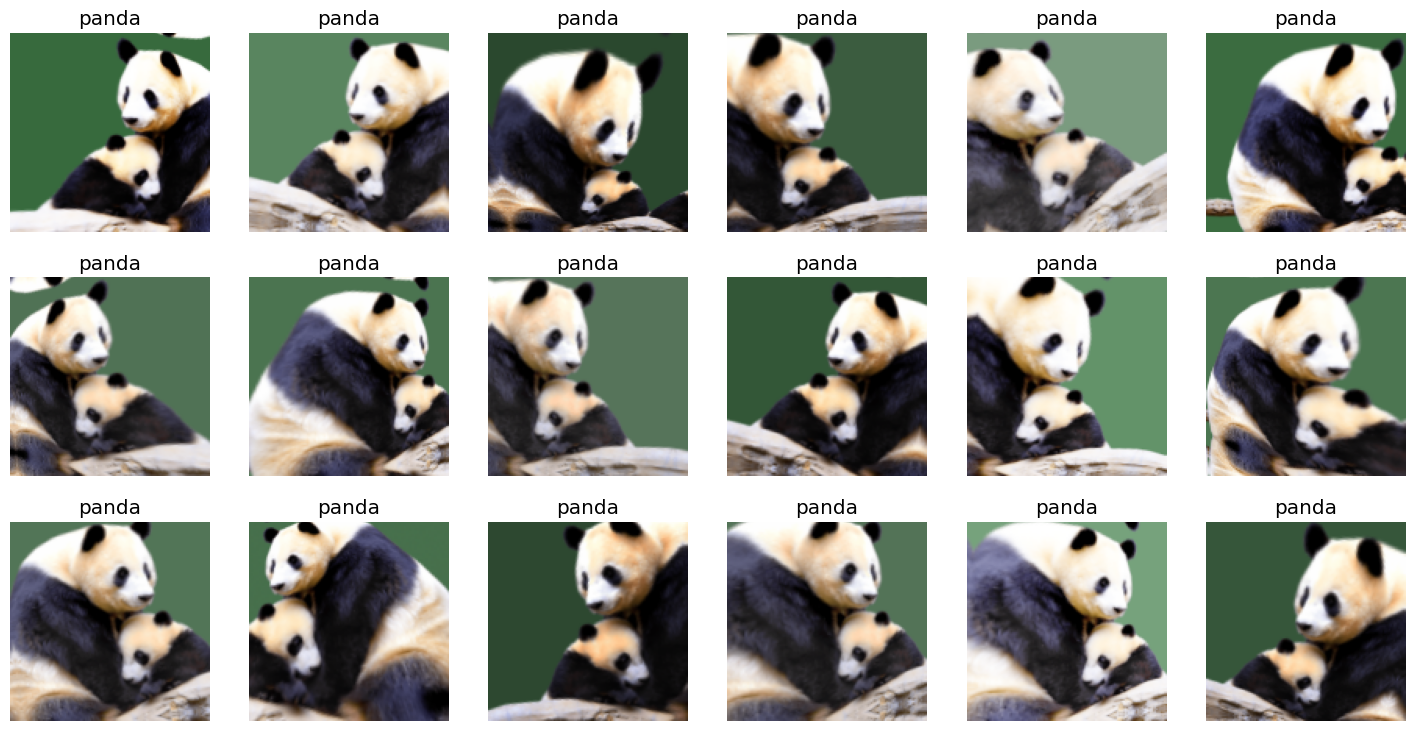

In [11]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path,bs=64)
dls.train.show_batch(max_n=18, nrows=3, unique=True)

In [12]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [13]:
import timm

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=accuracy)
learn.fine_tune(4)

c:\Users\bonru\AppData\Local\Programs\Python\Python311\Lib\site-packages\timm\models\_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,accuracy,time
0,1.305635,0.082641,0.973770,06:16


epoch,train_loss,valid_loss,accuracy,time
0,0.180346,0.050597,0.990164,07:36
1,0.139156,0.047928,0.993443,07:38
2,0.112035,0.045333,0.993443,07:39
3,0.083279,0.045300,0.993443,07:47


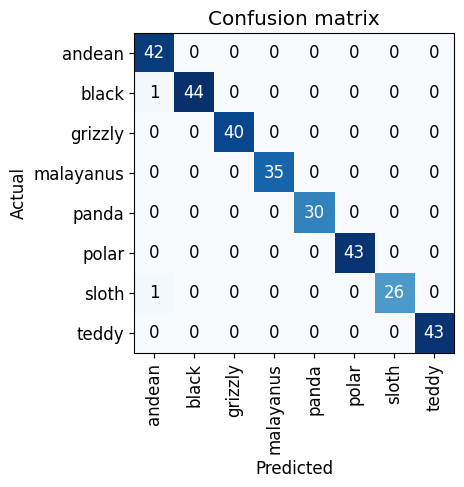

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

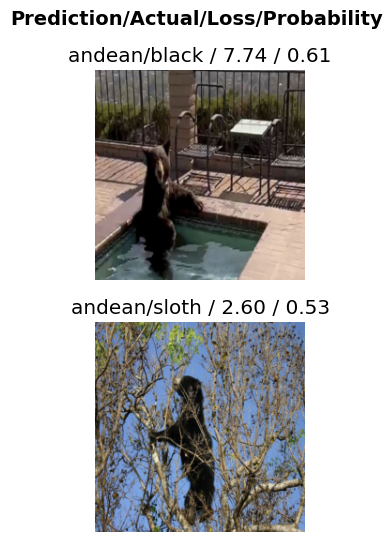

In [16]:
interp.plot_top_losses(2, nrows=2)

In [17]:
learn.export()